<a href="https://colab.research.google.com/github/nafiul-araf/Lab-work/blob/main/Association_Rule_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading The Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules

%matplotlib inline
sns.set(rc={
    'figure.figsize':(20, 15)
})

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("Copy of Depression and Happiness Factor Analysis.csv")
#df.head()

# Preprocessing

In [ ]:
df.shape

(920, 21)

In [ ]:
df1=df.drop(['Timestamp','How much have you succeeded to cope up with the environment of your educational institution?','How long did you sleep last night?(in hours)','Age','Unnamed: 20'],axis='columns')
#df1.head()

In [ ]:
df1.isnull().sum()

Which year are you in?                                                         0
How are you feeling right now?                                                 0
On a scale of 1-100, how would you express this feeling?                       0
Gender                                                                         0
Your location ?                                                                0
Relationship status                                                            0
Are you happy with your financial state?                                       0
Understanding with your family members?                                        0
Are you feeling pressure in your study or work right now?                      0
Are you satisfied with your academic result?                                   0
Are you happy with your living place?                                          0
Who supports you when you are not succeeding in your academic life?            0
Have you used any social med

In [ ]:
df1.columns

Index(['Which year are you in?', 'How are you feeling right now?',
       'On a scale of 1-100, how would you express this feeling?', 'Gender',
       'Your location ?', 'Relationship status',
       'Are you happy with your financial state?',
       'Understanding with your family members?',
       'Are you feeling pressure in your study or work right now?',
       'Are you satisfied with your academic result?',
       'Are you happy with your living place?',
       'Who supports you when you are not succeeding in your academic life?',
       'Have you used any social media within the last 6 hours?',
       'Are you satisfied with your meal today?',
       'Are you feeling sick/health issues today?',
       'Have you done any recreational activity (sports, gaming, hobby etc.) today?'],
      dtype='object')

In [ ]:
df1.rename({'Relationship status':'Relationship_status','Are you satisfied with your meal today?':'Satisfaction_with_meal','Which year are you in?':'Year','How are you feeling right now?':'Felling_right_now','Your location ?':'Location','Are you happy with your financial state?':'Happy_with_financial','Understanding with your family members?':'Understanding_with_family','Are you feeling pressure in your study or work right now?':'Study_pressure','Are you satisfied with your academic result?':'Satisfaction_academic_result','Are you happy with your living place?':'Living_place_happiness','Who supports you when you are not succeeding in your academic life?':'Supports_in_academic_life','Have you used any social media within the last 6 hours?':'Using_social_media','Do you have inferiority complex?':'Inferiority_complex','Are you feeling sick/health issues today?':'Sick_or_not_today','Have you done any recreational activity (sports, gaming, hobby etc.) today?':'Recreational_activity','On a scale of 1-100, how would you express this feeling?':'Express_feeling'},axis=1,inplace=True)
#df1.head()

In [ ]:
df1.shape

(920, 16)

# Implementation

*In this section, I generated the association rules of all the itemsets.*

In [ ]:
data=[]

for i in range(0,920):
    data.append([str(df1.values[i,n]) for n in range(0,16)])

In [ ]:
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
te=TransactionEncoder()

In [ ]:
encode=te.fit_transform(data)

encode_df=pd.DataFrame(encode,columns=te.columns_)

In [ ]:
#Finding The Frequent Itemsets
freq_itemset=apriori(encode_df,min_support=0.10,use_colnames=True)
freq_itemset

,support,itemsets
0,0.177174,(1)
1,0.232609,(100)
2,0.250000,(1st year)
3,0.250000,(2nd year)
4,0.180435,(30)
...,...,...
1754,0.204348,"(Yes, 100, Very good, No, Single, Male, Good, ..."
1755,0.119565,"(Yes, 1st year, Hall-Mess, Not applicable, No,..."
1756,0.118478,"(Yes, Family, No, Single, Male, Good, 4th year..."
1757,0.131522,"(Yes, Friends, No, Single, Male, Good, 4th yea..."


In [ ]:
#Generating The Association Rules
asso_rules=association_rules(freq_itemset,min_threshold=0.06)
asso_rules=asso_rules.sort_values(['support','confidence'])
asso_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1329,(Good),"(75, Friends)",1.0,0.1,0.1,0.1,1.0,0.0,1.0
1335,(Male),"(75, Friends)",1.0,0.1,0.1,0.1,1.0,0.0,1.0
1341,(No),"(75, Friends)",1.0,0.1,0.1,0.1,1.0,0.0,1.0
1345,(Single),"(75, Friends)",1.0,0.1,0.1,0.1,1.0,0.0,1.0
1351,(Yes),"(75, Friends)",1.0,0.1,0.1,0.1,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
21939,(Yes),"(Single, Male, Good, No)",1.0,1.0,1.0,1.0,1.0,0.0,inf
21940,(No),"(Yes, Single, Male, Good)",1.0,1.0,1.0,1.0,1.0,0.0,inf
21941,(Single),"(Yes, Male, Good, No)",1.0,1.0,1.0,1.0,1.0,0.0,inf
21942,(Male),"(Yes, Single, Good, No)",1.0,1.0,1.0,1.0,1.0,0.0,inf


In [ ]:
asso_rules.shape

(45810, 9)

In [ ]:
apriori_rules=asso_rules.head(300)

In [ ]:
apriori_rules.shape

(300, 9)

# Visualizing the first 300 rules according the Lift values

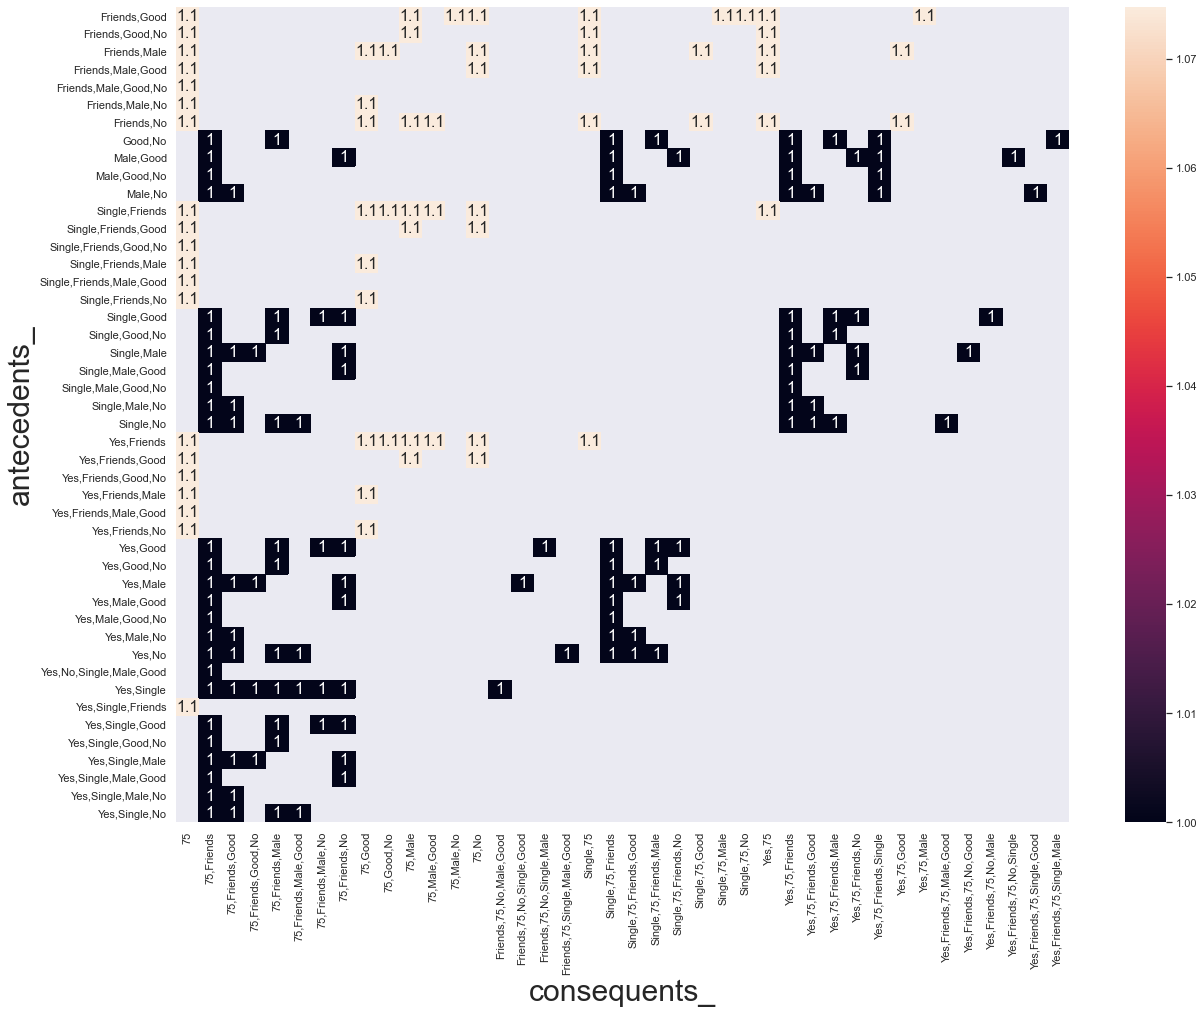

In [ ]:
apriori_rules['lhs_items']=apriori_rules['antecedents'].apply(lambda x:len(x))
apriori_rules[apriori_rules['lhs_items']>1].sort_values('lift',ascending=False).head()
apriori_rules['antecedents_']=apriori_rules['antecedents'].apply(lambda a: ','.join(list(a)))
apriori_rules['consequents_']=apriori_rules['consequents'].apply(lambda a: ','.join(list(a)))
pivot=apriori_rules[apriori_rules['lhs_items']>1].pivot(index='antecedents_',columns='consequents_',values='lift')
b=sns.heatmap(pivot,annot=True,annot_kws={"size": 16})
b.set_xlabel("consequents_",fontsize=30)
b.set_ylabel("antecedents_",fontsize=30)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

# Visualizing the first 300 rules according the Support values

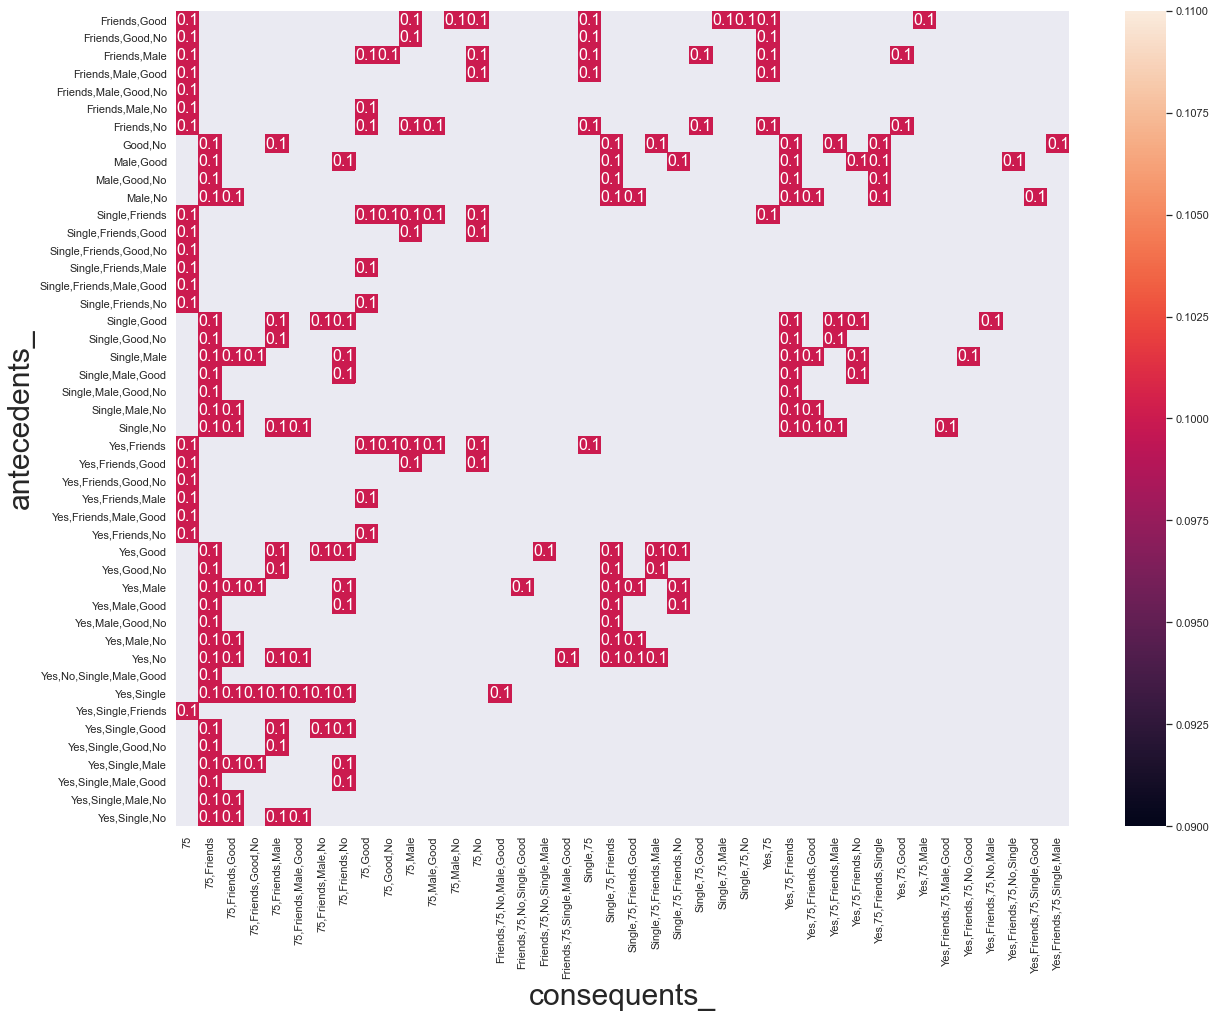

In [ ]:
apriori_rules['lhs_items']=apriori_rules['antecedents'].apply(lambda x:len(x))
apriori_rules[apriori_rules['lhs_items']>1].sort_values('lift',ascending=False).head()
apriori_rules['antecedents_']=apriori_rules['antecedents'].apply(lambda a: ','.join(list(a)))
apriori_rules['consequents_']=apriori_rules['consequents'].apply(lambda a: ','.join(list(a)))
pivot=apriori_rules[apriori_rules['lhs_items']>1].pivot(index='antecedents_',columns='consequents_',values='support')
b=sns.heatmap(pivot,annot=True,annot_kws={"size": 16})
b.set_xlabel("consequents_",fontsize=30)
b.set_ylabel("antecedents_",fontsize=30)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

# Visualizing the first 300 rules according the Confidence values

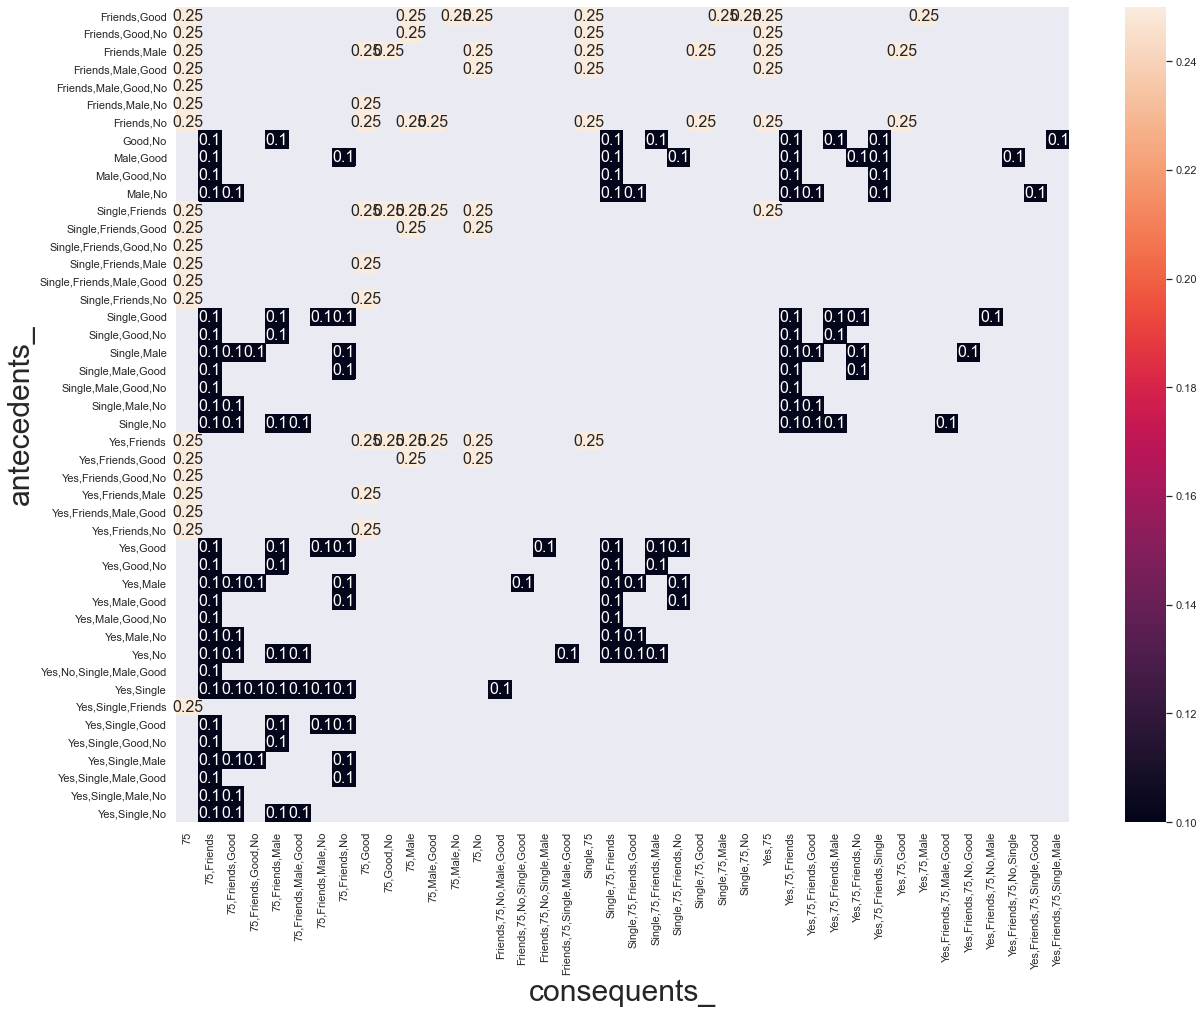

In [ ]:
apriori_rules['lhs_items']=apriori_rules['antecedents'].apply(lambda x:len(x))
apriori_rules[apriori_rules['lhs_items']>1].sort_values('lift',ascending=False).head()
apriori_rules['antecedents_']=apriori_rules['antecedents'].apply(lambda a: ','.join(list(a)))
apriori_rules['consequents_']=apriori_rules['consequents'].apply(lambda a: ','.join(list(a)))
pivot=apriori_rules[apriori_rules['lhs_items']>1].pivot(index='antecedents_',columns='consequents_',values='confidence')
b=sns.heatmap(pivot,annot=True,annot_kws={"size": 16})
b.set_xlabel("consequents_",fontsize=30)
b.set_ylabel("antecedents_",fontsize=30)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

# Deep Analysis

*In this section, I analyzed the unique element of each features which have more than one unique value or element and found the association rules with my feelings level (Very Good, Good, Normal, Bad, Very Bad)*


* Finding the association rules and visualize them using the imported `apriori_association_rules()` function.
```Python
    def apriori_association_rules(df,column):
    """This function analyse the unique element of each features which have more than one unique value or element and found the association rules with the feelings level 
    (Very Good, Good, Normal, Bad, Very Bad). It splits the data according to the each unique values of the features. One Hot encoding are used to encode the data. Then it builds 
    the model and analyses the result.
    
    Input:
         df: The entire pandas dataframe.
         column: The target feature. One feature at a time.
    
    Output:
         un_val: A list of unique values/items of the given features.
         basket_list: A list of splitting data according to the each unique values of the features. The data is a pandas dataframe for each item.
         basket_list_encoded: A list of encoded data of the splitting data.
         apriori_rules_list: A list of tuple of the resultant association rules shape (rows, columns). Rows are the total founded rules.
         plot: Visualization of founded association rules for each unique items. It returns a seaborn's heatmap for each of the items.
    """
    
    un_val=list(df[column].unique())
    #return un_val
    
    basket_list=[]
    for i in un_val:
        basket_i = (df[df[column] == i] 
          .groupby(['Year', 'Felling_right_now'])['Express_feeling'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('Year'))
        basket_list.append(basket_i)
    #return un_val, basket_list
```
    
```Python
    basket_list_encoded=[]
    def hot_encode(x): 
        if(x<= 0): 
            return 0
        if(x>= 1): 
            return 1
    for i in basket_list:
        basket_encode = i.applymap(hot_encode)
        basket_list_encoded.append(basket_encode)
    #return un_val, basket_list, basket_list_encoded
    
    apriori_rules_list=[]
    for i in basket_list_encoded:
        frq_items = apriori(i, min_support = 0.05, use_colnames = True)
        apriori_rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
        apriori_rules = apriori_rules.sort_values(['confidence', 'lift'], ascending =[False, False])
        apriori_rules = apriori_rules.shape
        apriori_rules_list.append(apriori_rules)
    #return un_val, basket_list, basket_list_encoded, apriori_rules_list
    
    apriori_rules_df=[]
    for i in basket_list_encoded:
        frq_items = apriori(i, min_support = 0.05, use_colnames = True)
        apriori_rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
        apriori_rules = apriori_rules.sort_values(['confidence', 'lift'], ascending =[False, False])
        apriori_rules_df.append(apriori_rules)
    #return un_val, basket_list, basket_list_encoded, apriori_rules_list
    
    
    for i in apriori_rules_df:
        i['lhs_items']=i['antecedents'].apply(lambda x:len(x) )
        i[i['lhs_items']>1].sort_values('lift',ascending=False).head()
        i['antecedents_']=i['antecedents'].apply(lambda a: ','.join(list(a)))
        i['consequents_']=i['consequents'].apply(lambda a: ','.join(list(a)))
        pivot=i[i['lhs_items']>1].pivot(index='antecedents_',columns='consequents_',values='lift')
        b=sns.heatmap(pivot,annot=True,annot_kws={"size": 16})
        b.set_xlabel("consequents_",fontsize=30)
        b.set_ylabel("antecedents_",fontsize=30)
        plt.yticks(rotation=0)
        plt.xticks(rotation=90)
        plt.show()
    
    return un_val, basket_list, basket_list_encoded, apriori_rules_list
```

In [ ]:
from my_association_custom import apriori_association_rules

**Satisfaction_with_meal**

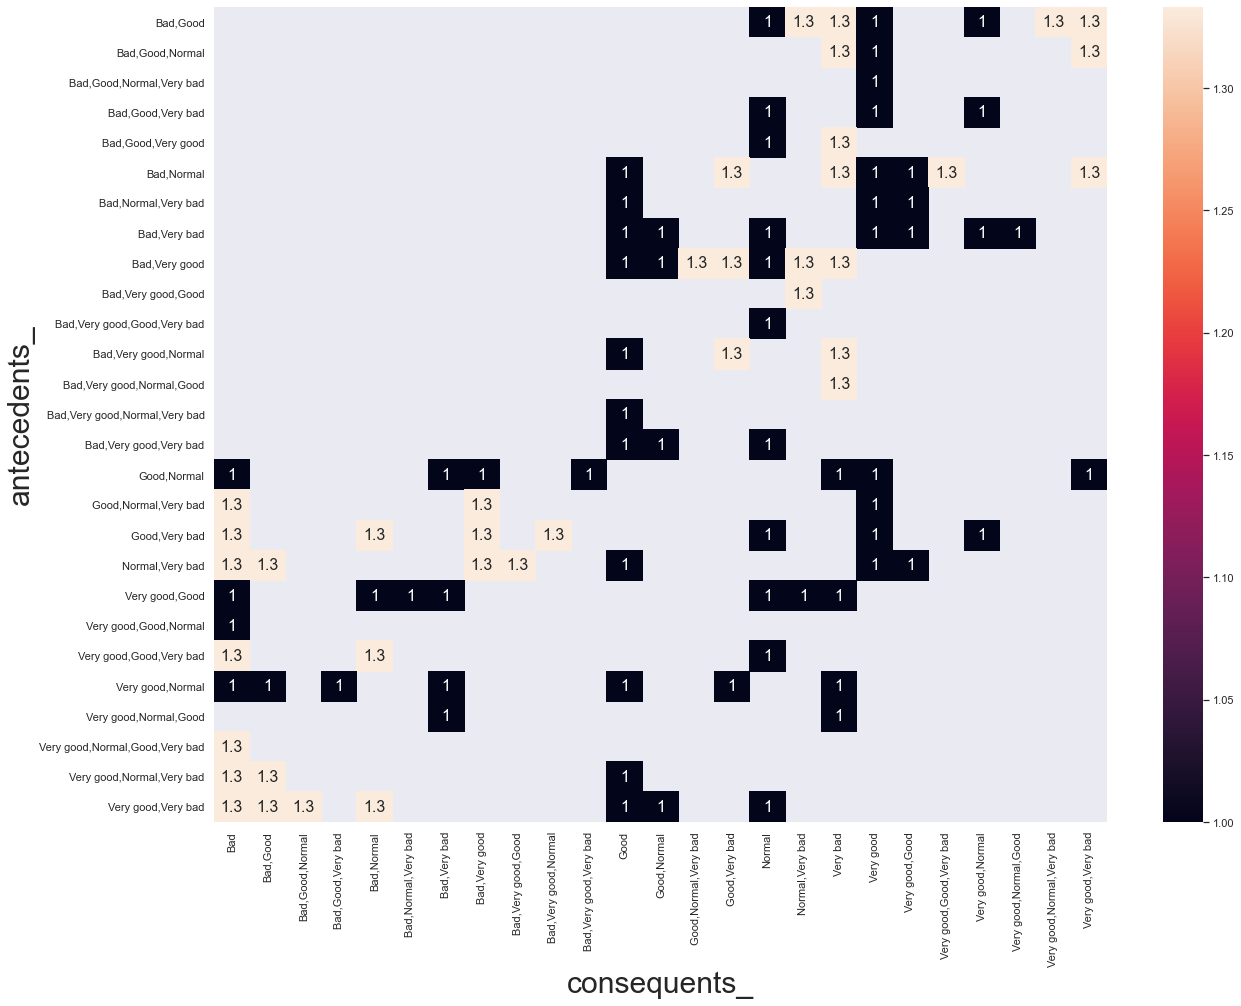

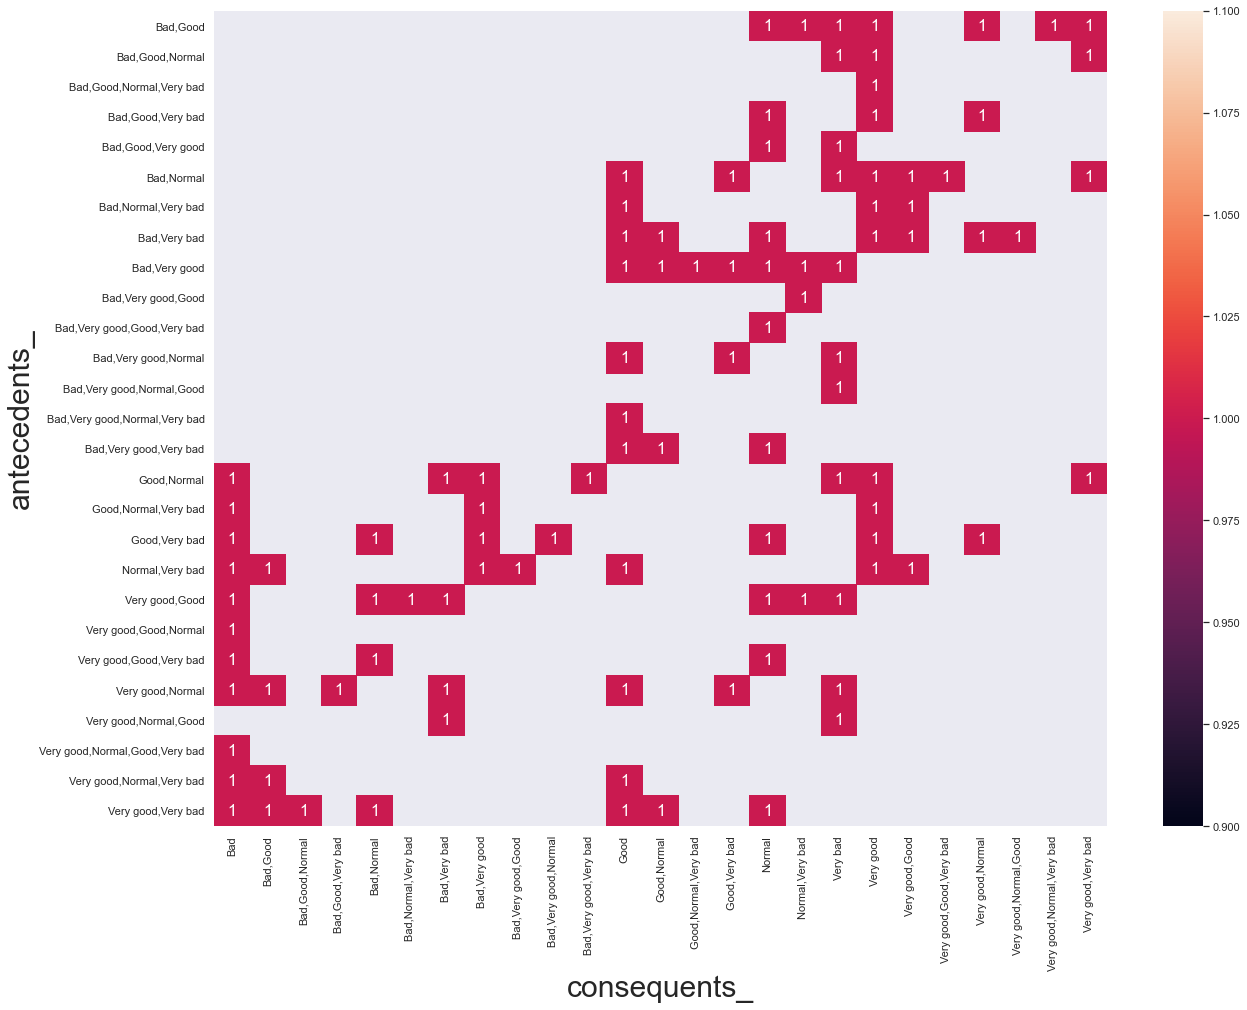

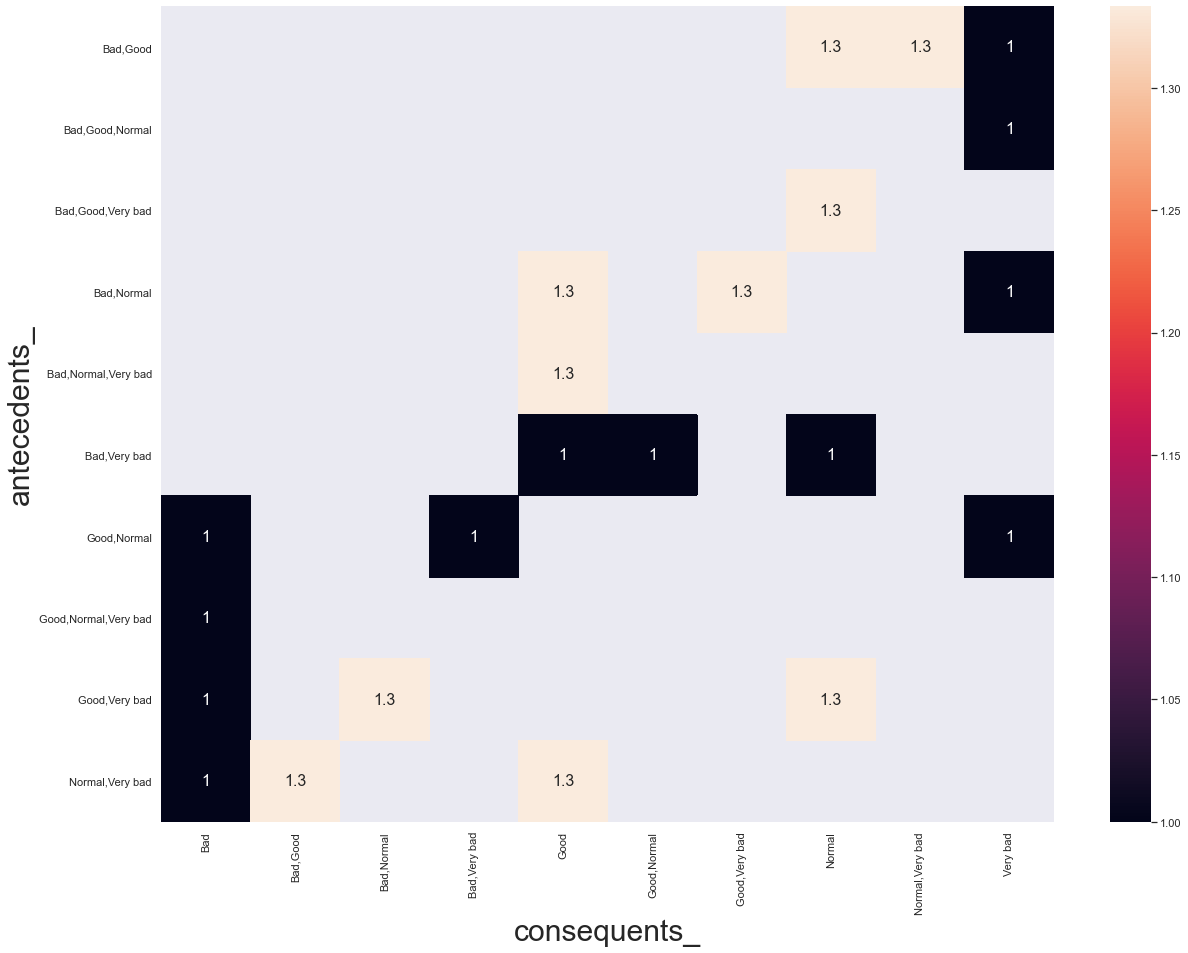

(['Yes', 'Neutral', 'No'],
 [Felling_right_now    Bad    Good  Normal  Very bad  Very good
  Year                                                         
  1st year            90.0  3375.0   750.0       0.0     4500.0
  2nd year           180.0  2700.0  1140.0       1.0     4985.0
  3rd year             0.0  3000.0  1125.0       0.0     4600.0
  4th year           451.0  3850.0  1584.0       5.0     6993.0,
  Felling_right_now    Bad   Good  Normal  Very bad  Very good
  Year                                                        
  1st year           510.0  675.0  1749.0      14.0      300.0
  2nd year           540.0  300.0  1155.0       7.0      100.0
  3rd year           510.0  525.0  1380.0       6.0        0.0
  4th year           480.0  150.0   675.0      13.0      100.0,
  Felling_right_now    Bad   Good  Normal  Very bad
  Year                                             
  1st year           560.0    0.0   570.0      25.0
  2nd year           720.0  150.0   405.0      35.0
 

In [ ]:
apriori_association_rules(df1,'Satisfaction_with_meal')

***Are you feeling pressure in your study or work right now?***

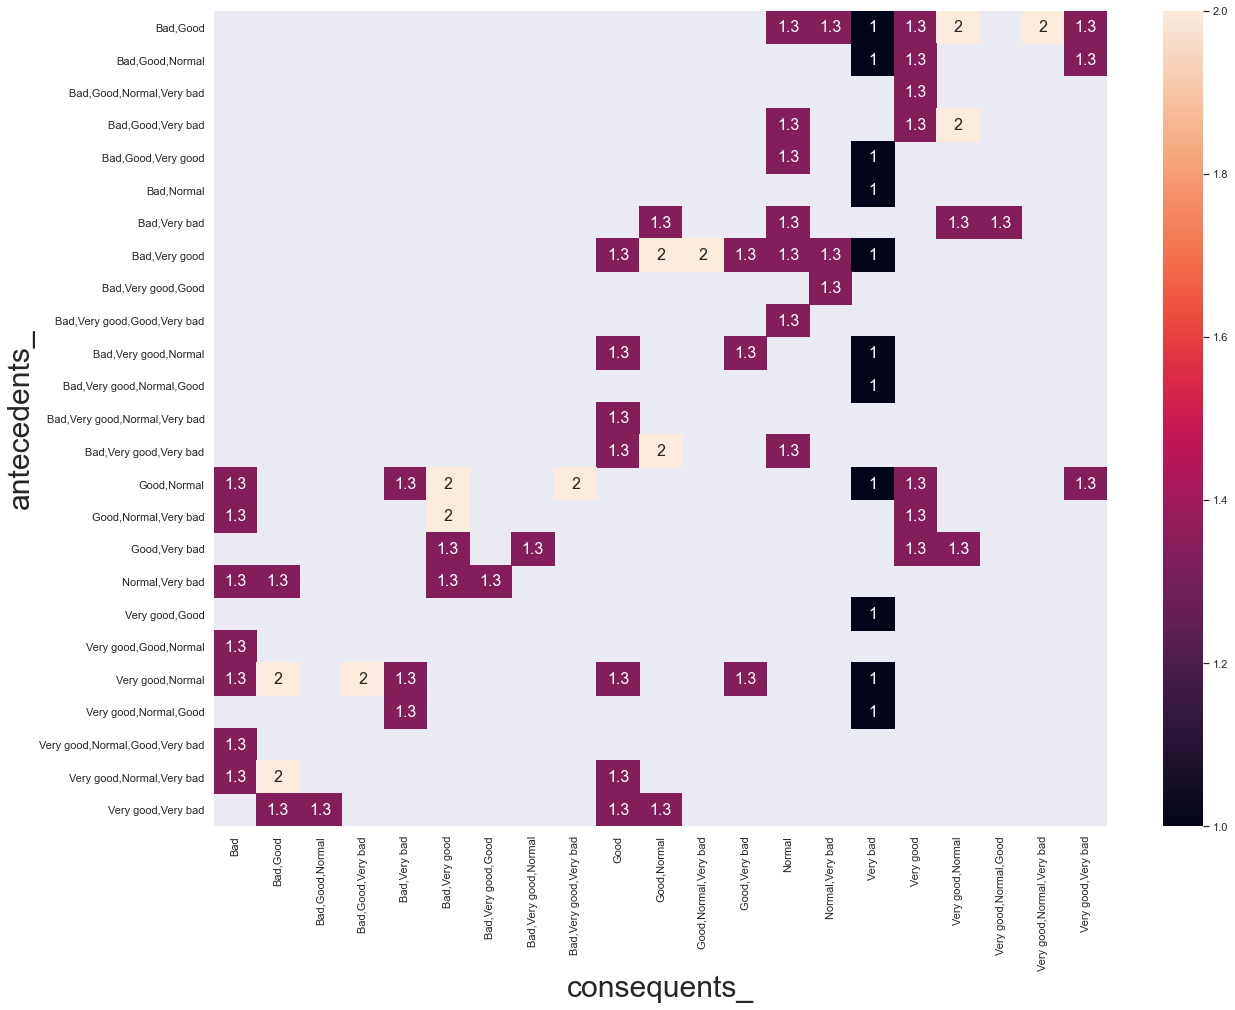

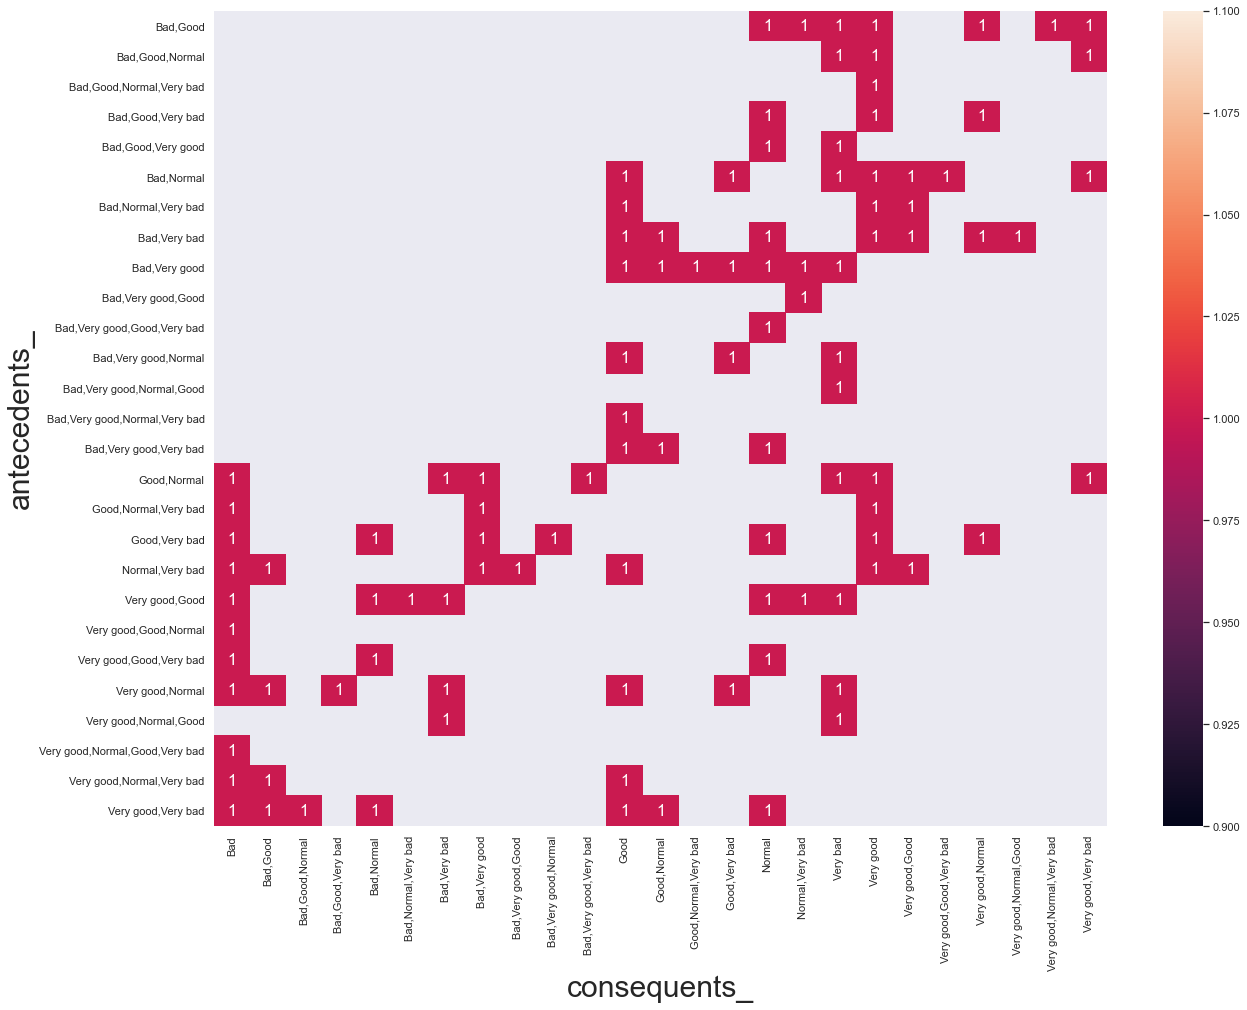

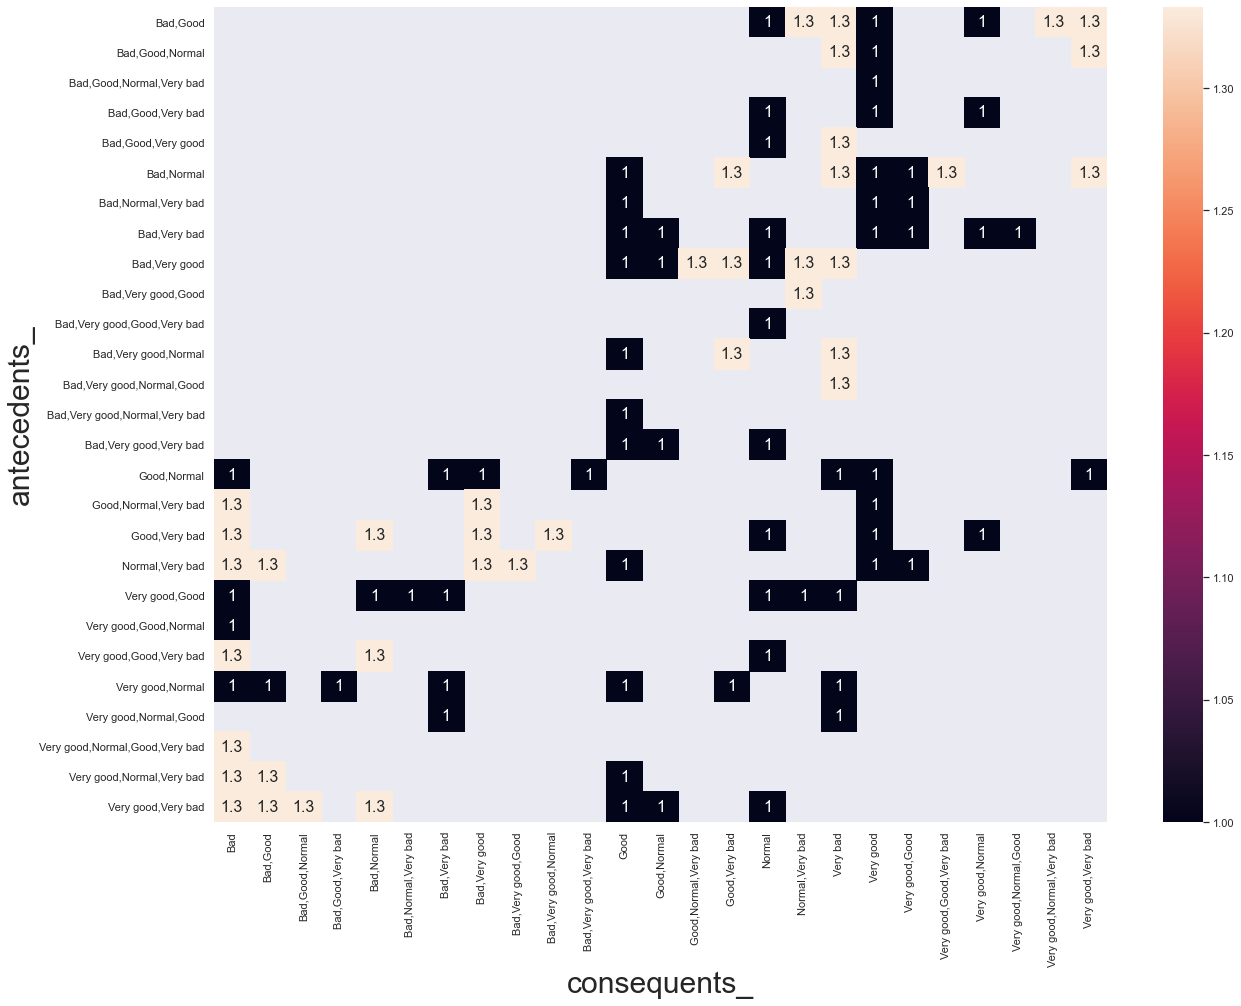

(['Not applicable', 'Yes', 'No'],
 [Felling_right_now    Bad   Good  Normal  Very bad  Very good
  Year                                                        
  1st year           150.0   75.0   195.0       9.0      200.0
  2nd year           300.0    0.0    60.0       5.0        0.0
  3rd year           210.0  150.0   180.0      12.0      100.0
  4th year             0.0   75.0     0.0       1.0      693.0,
  Felling_right_now     Bad    Good  Normal  Very bad  Very good
  Year                                                          
  1st year            870.0  1800.0  2439.0      26.0      300.0
  2nd year           1110.0  2250.0  2445.0      35.0        0.0
  3rd year           1020.0  2400.0  2505.0      32.0        0.0
  4th year           1081.0  3175.0  2139.0      31.0      300.0,
  Felling_right_now    Bad    Good  Normal  Very bad  Very good
  Year                                                         
  1st year           140.0  2175.0   435.0       4.0     4300.0
  2n

In [ ]:
apriori_association_rules(df1,'Study_pressure')

**Who supports you when you are not succeeding in your academic life?**

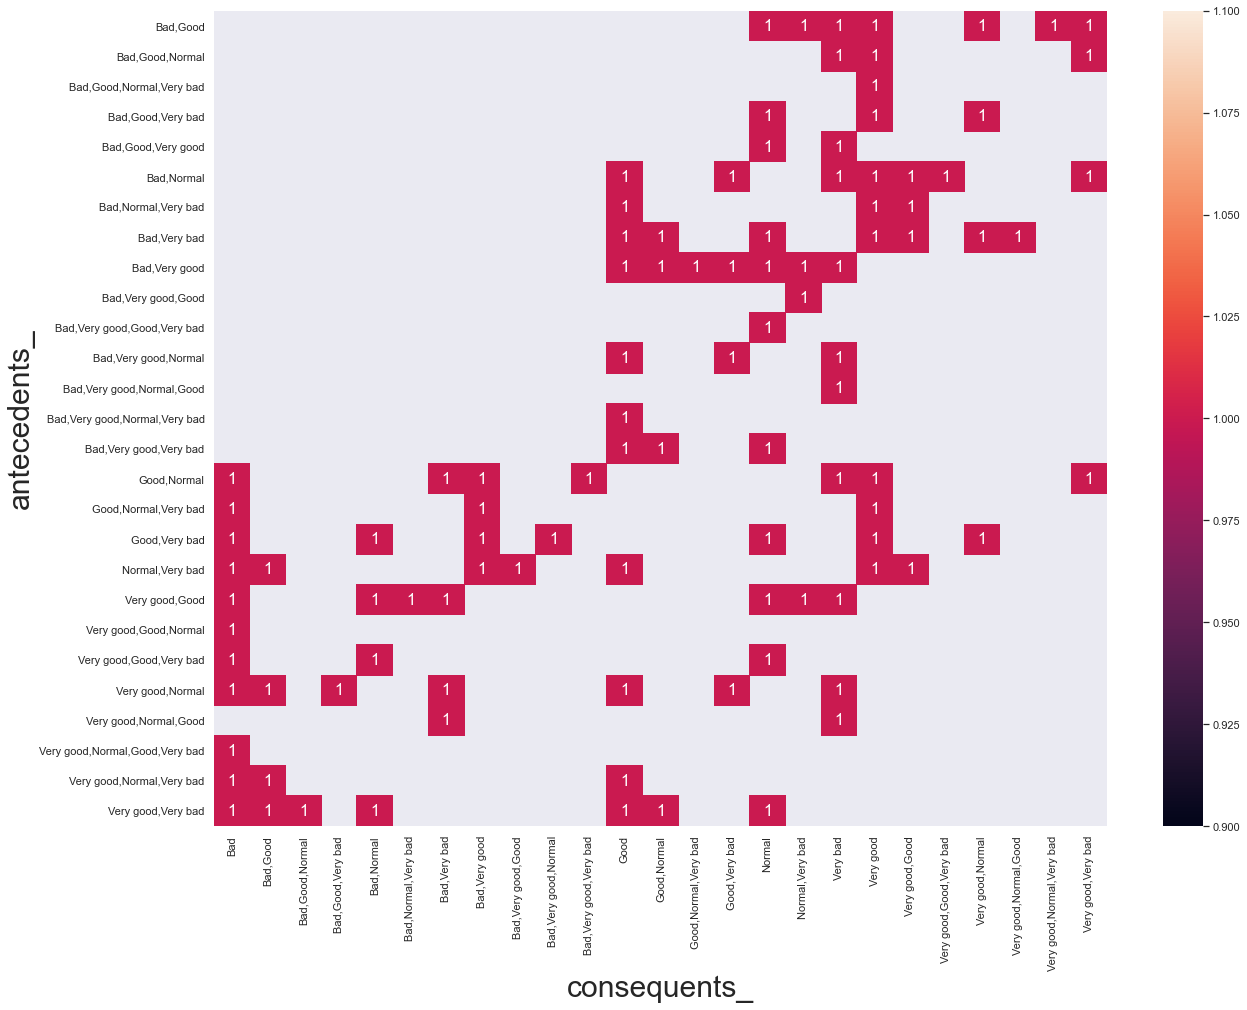

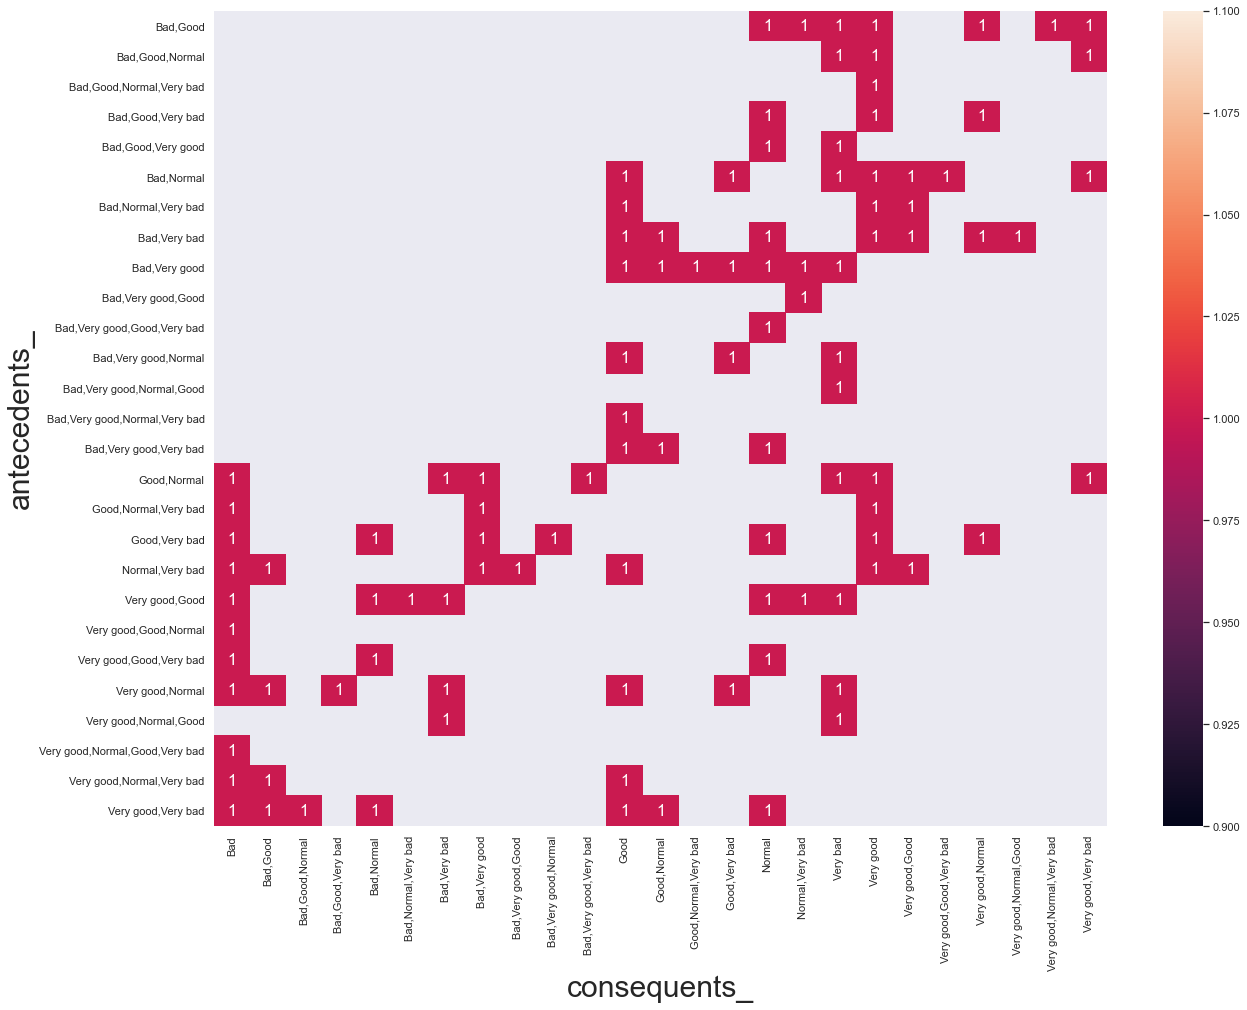

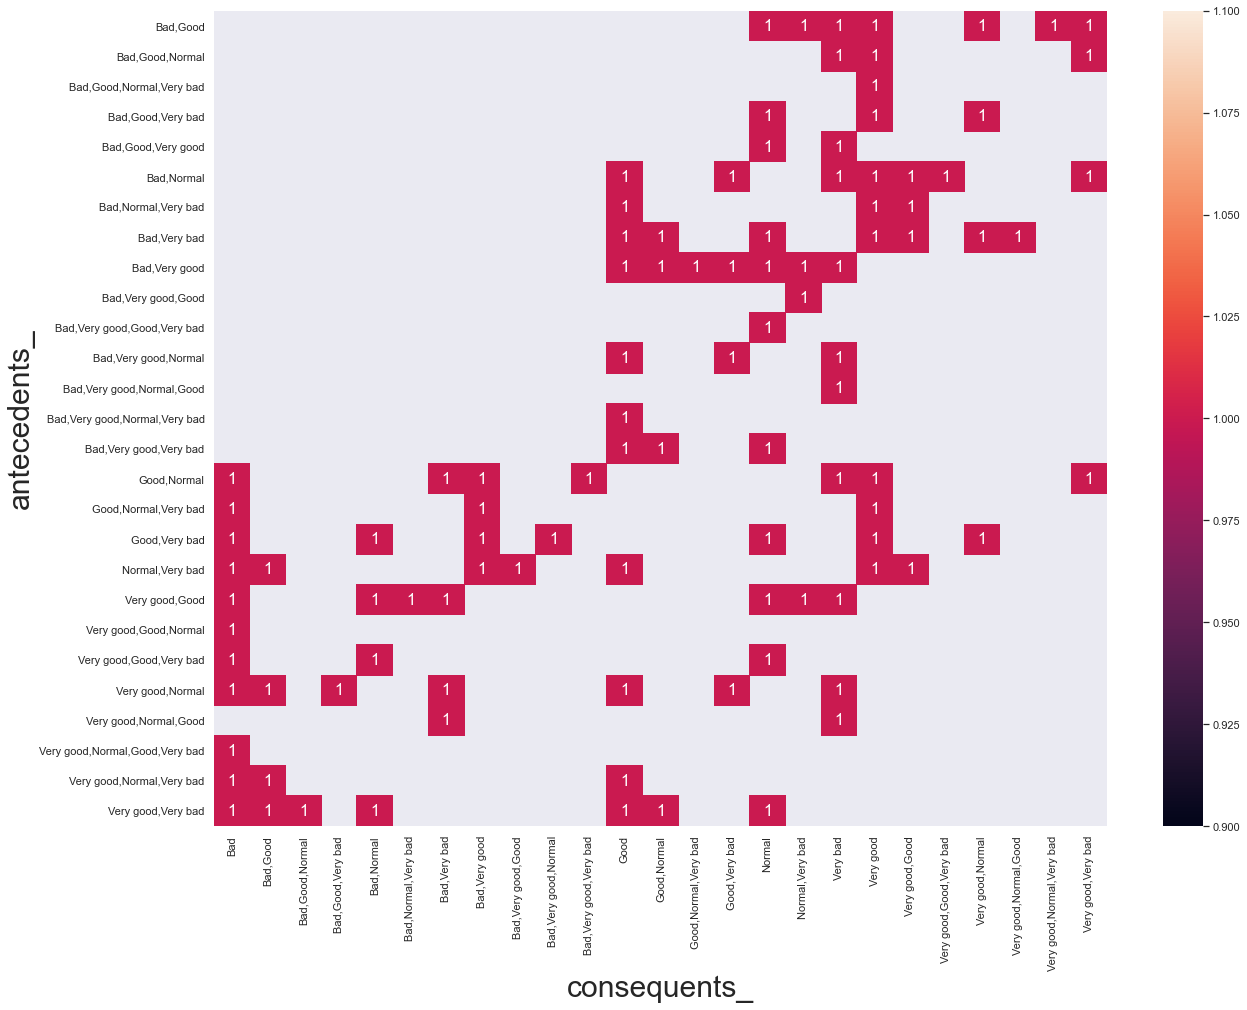

(['Family', 'Friends', 'Not applicable'],
 [Felling_right_now  Bad  Good  Normal  Very bad  Very good
  Year                                                     
  1st year            90   900     735         2        800
  2nd year           540  1275    1275        22       2685
  3rd year           690  1650    1620        26       1900
  4th year           541  1425    1044        12       4193,
  Felling_right_now  Bad  Good  Normal  Very bad  Very good
  Year                                                     
  1st year            30   450     120         3        300
  2nd year           870  1650    1365        21       2300
  3rd year           570  1950    1245        22       2700
  4th year           540  2575    1215        20       2900,
  Felling_right_now     Bad    Good  Normal  Very bad  Very good
  Year                                                          
  1st year           1040.0  2700.0  2214.0      34.0     3700.0
  2nd year             30.0   225.0    60

In [ ]:
apriori_association_rules(df1,'Supports_in_academic_life')

**Have you done any recreational activity (sports, gaming, hobby etc.) today?**

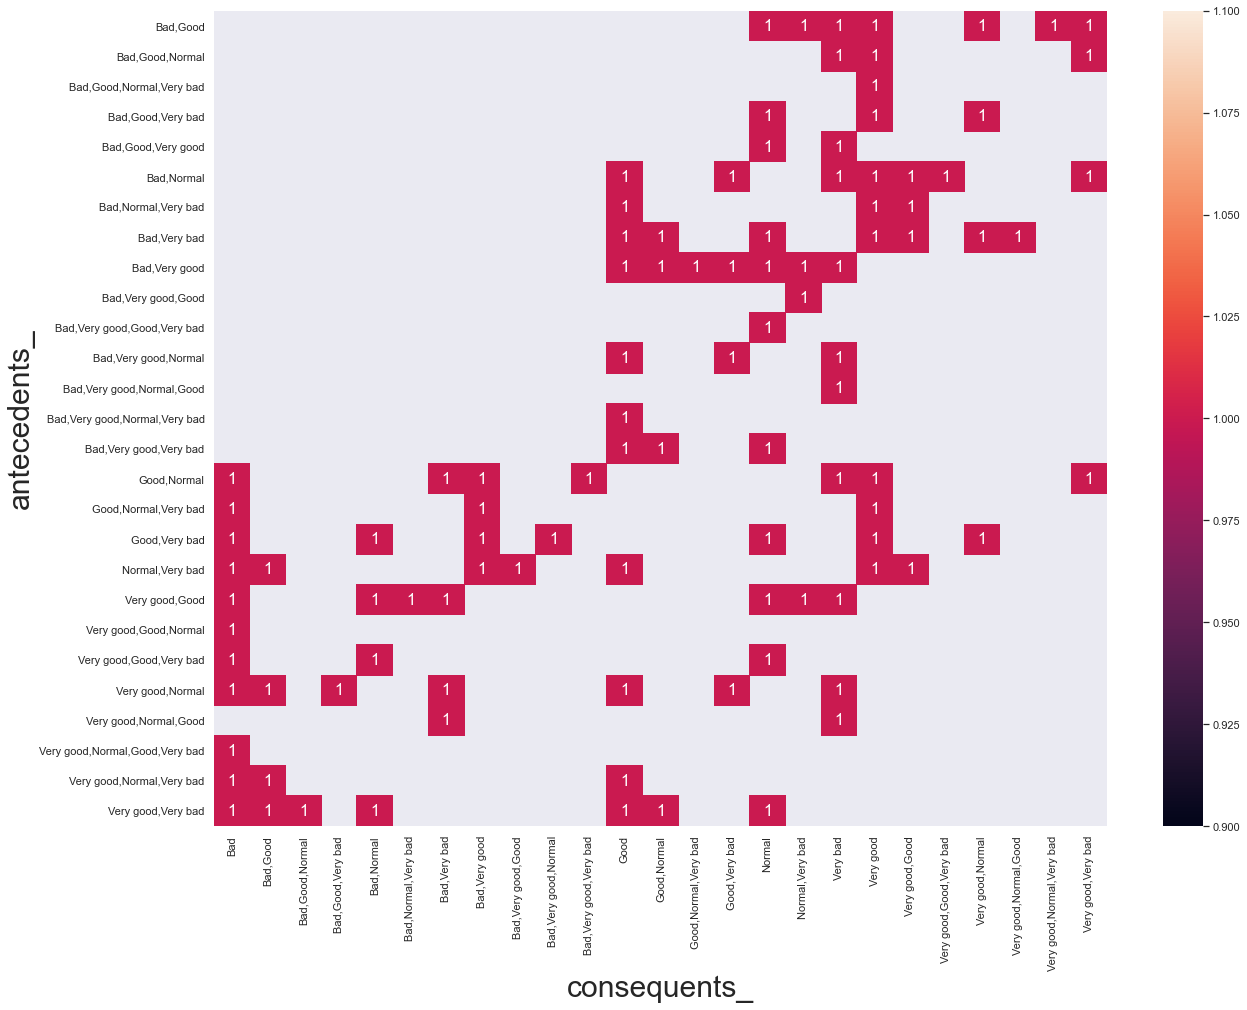

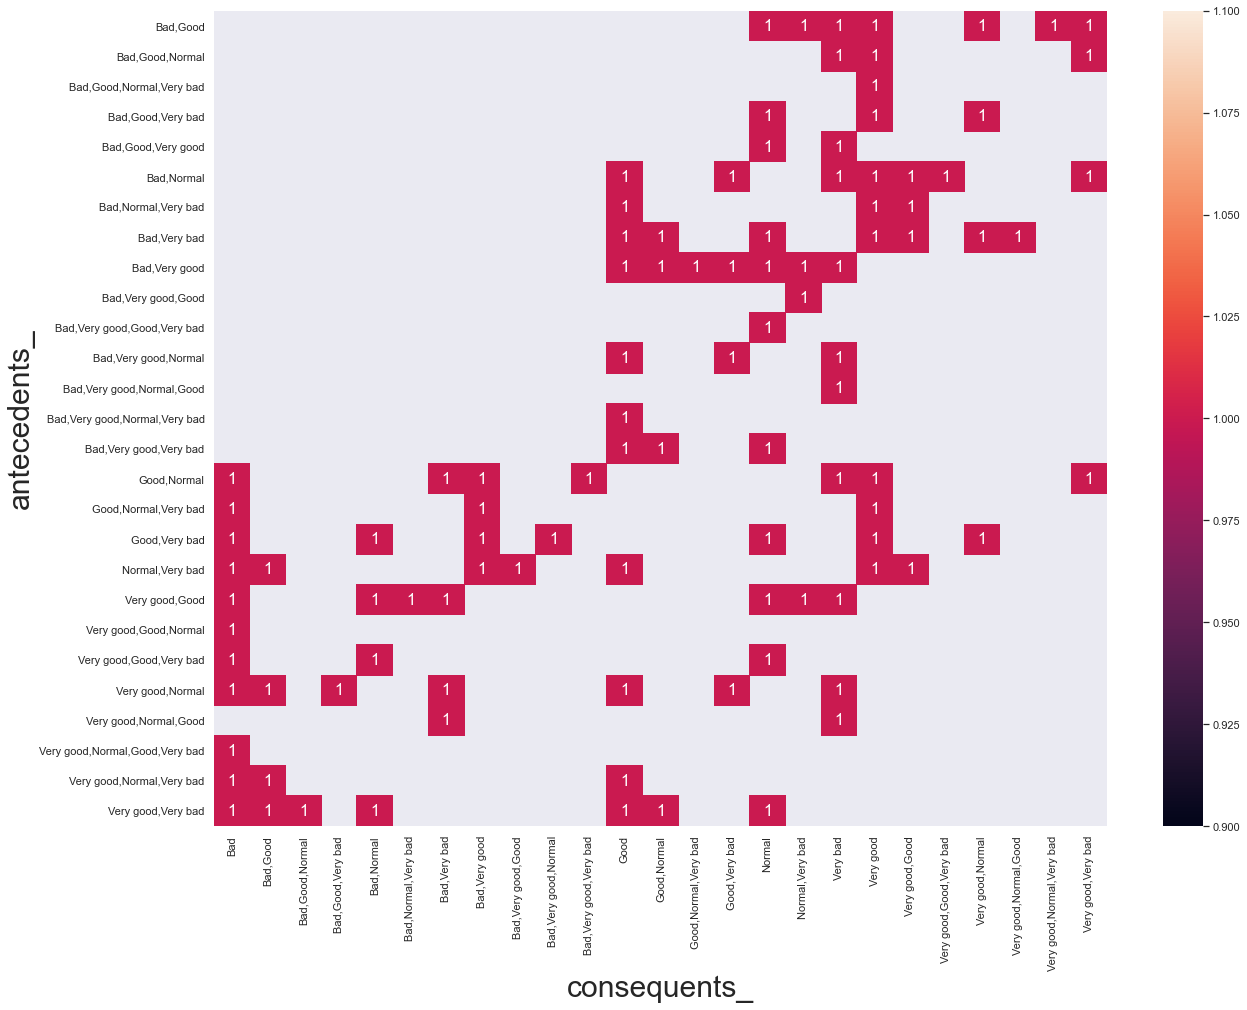

(['No', 'Yes'],
 [Felling_right_now   Bad  Good  Normal  Very bad  Very good
  Year                                                      
  1st year            800  1575    2010        36       1700
  2nd year           1080  1200    1575        41        600
  3rd year            990  1500    1575        45        800
  4th year            871  2575    1779        30       2293,
  Felling_right_now  Bad  Good  Normal  Very bad  Very good
  Year                                                     
  1st year           360  2475    1059         3       3100
  2nd year           360  1950    1125         2       4485
  3rd year           270  2100    1290         3       3800
  4th year           210  1425     480         2       4800],
 [Felling_right_now  Bad  Good  Normal  Very bad  Very good
  Year                                                     
  1st year             1     1       1         1          1
  2nd year             1     1       1         1          1
  3rd year     

In [ ]:
apriori_association_rules(df1,'Recreational_activity')

**Are you happy with your financial state?**

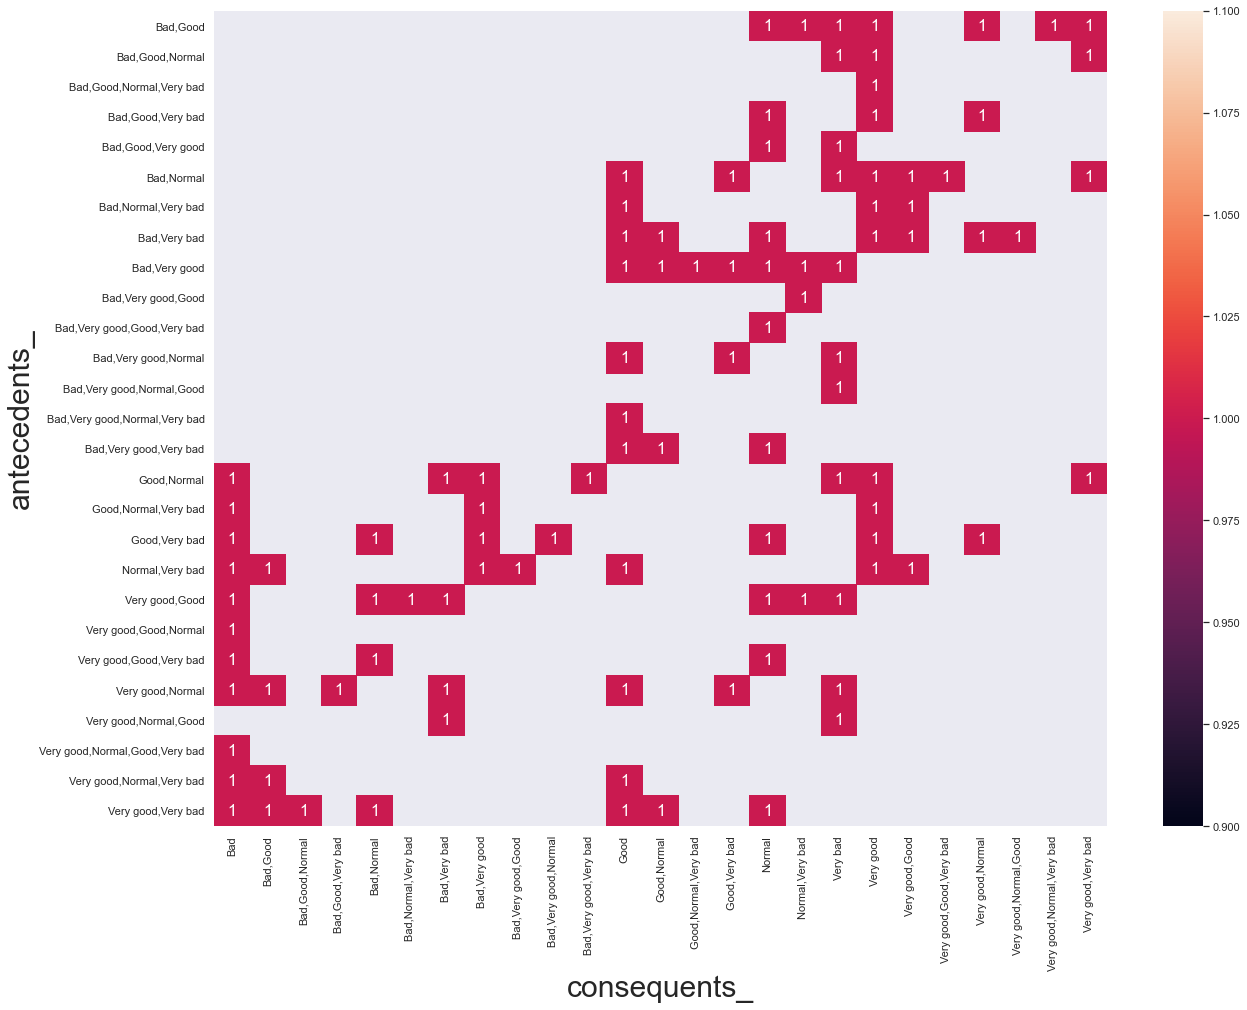

(['Yes'],
 [Felling_right_now   Bad  Good  Normal  Very bad  Very good
  Year                                                      
  1st year           1160  4050    3069        39       4800
  2nd year           1440  3150    2700        43       5085
  3rd year           1260  3600    2865        48       4600
  4th year           1081  4000    2259        32       7093],
 [Felling_right_now  Bad  Good  Normal  Very bad  Very good
  Year                                                     
  1st year             1     1       1         1          1
  2nd year             1     1       1         1          1
  3rd year             1     1       1         1          1
  4th year             1     1       1         1          1],
 [(180, 9)])

In [ ]:
apriori_association_rules(df1,'Happy_with_financial')

**Understanding with your family members?**

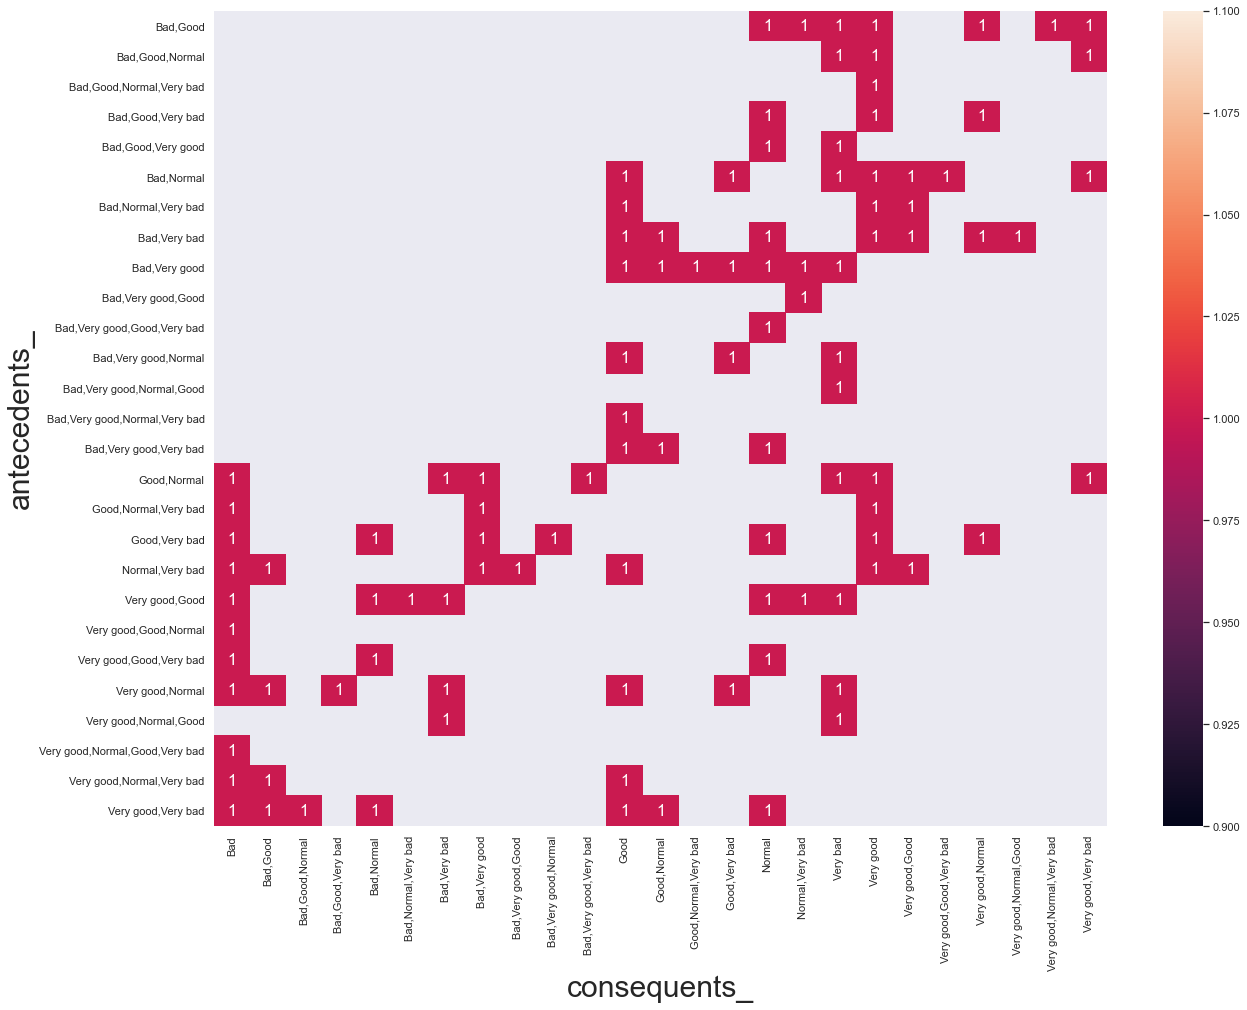

(['Good'],
 [Felling_right_now   Bad  Good  Normal  Very bad  Very good
  Year                                                      
  1st year           1160  4050    3069        39       4800
  2nd year           1440  3150    2700        43       5085
  3rd year           1260  3600    2865        48       4600
  4th year           1081  4000    2259        32       7093],
 [Felling_right_now  Bad  Good  Normal  Very bad  Very good
  Year                                                     
  1st year             1     1       1         1          1
  2nd year             1     1       1         1          1
  3rd year             1     1       1         1          1
  4th year             1     1       1         1          1],
 [(180, 9)])

In [ ]:
apriori_association_rules(df1,'Understanding_with_family')

**Are you happy with your living place?**

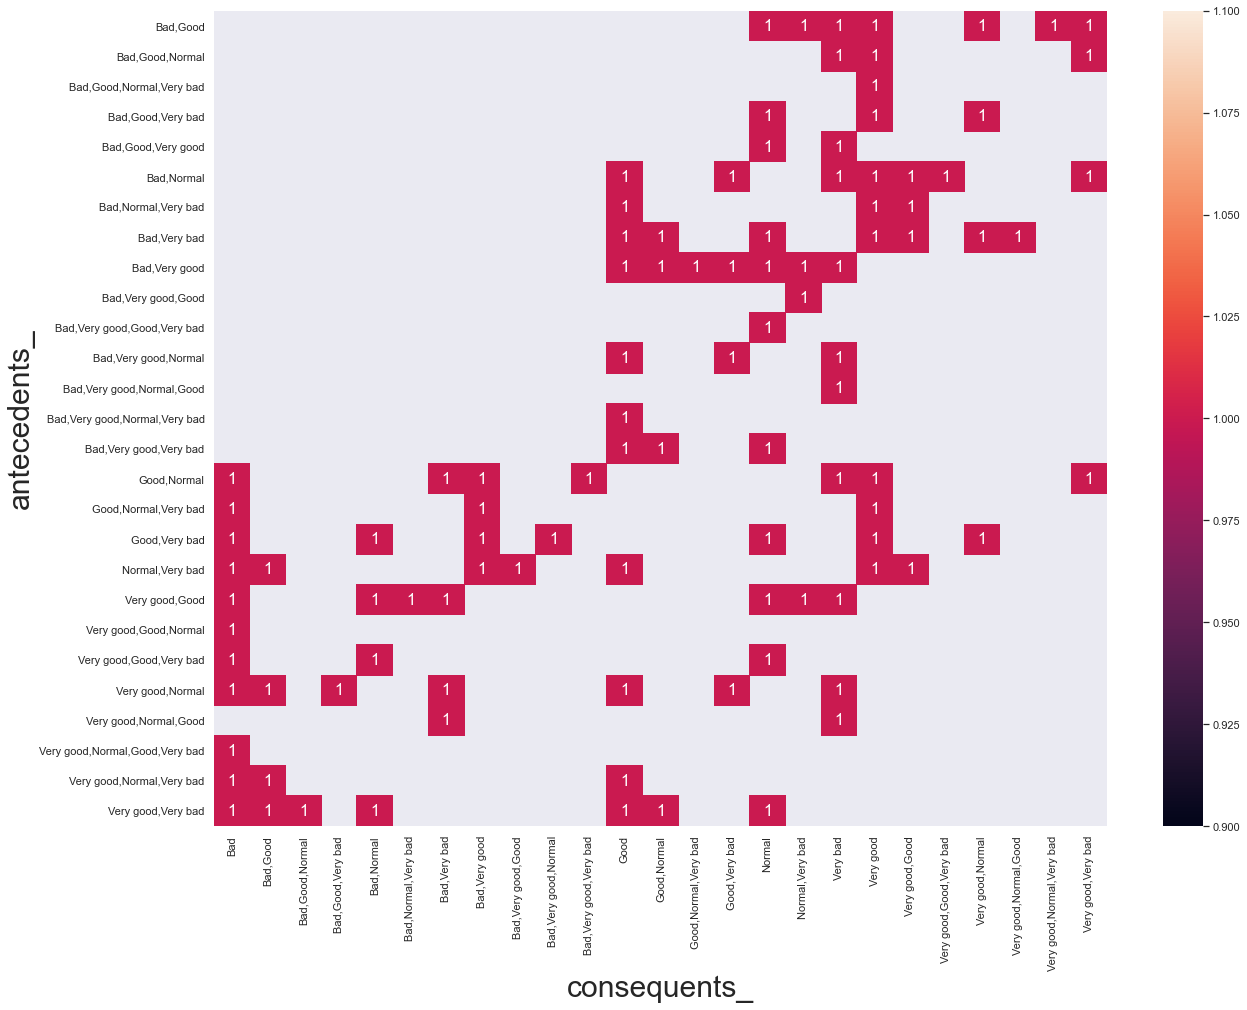

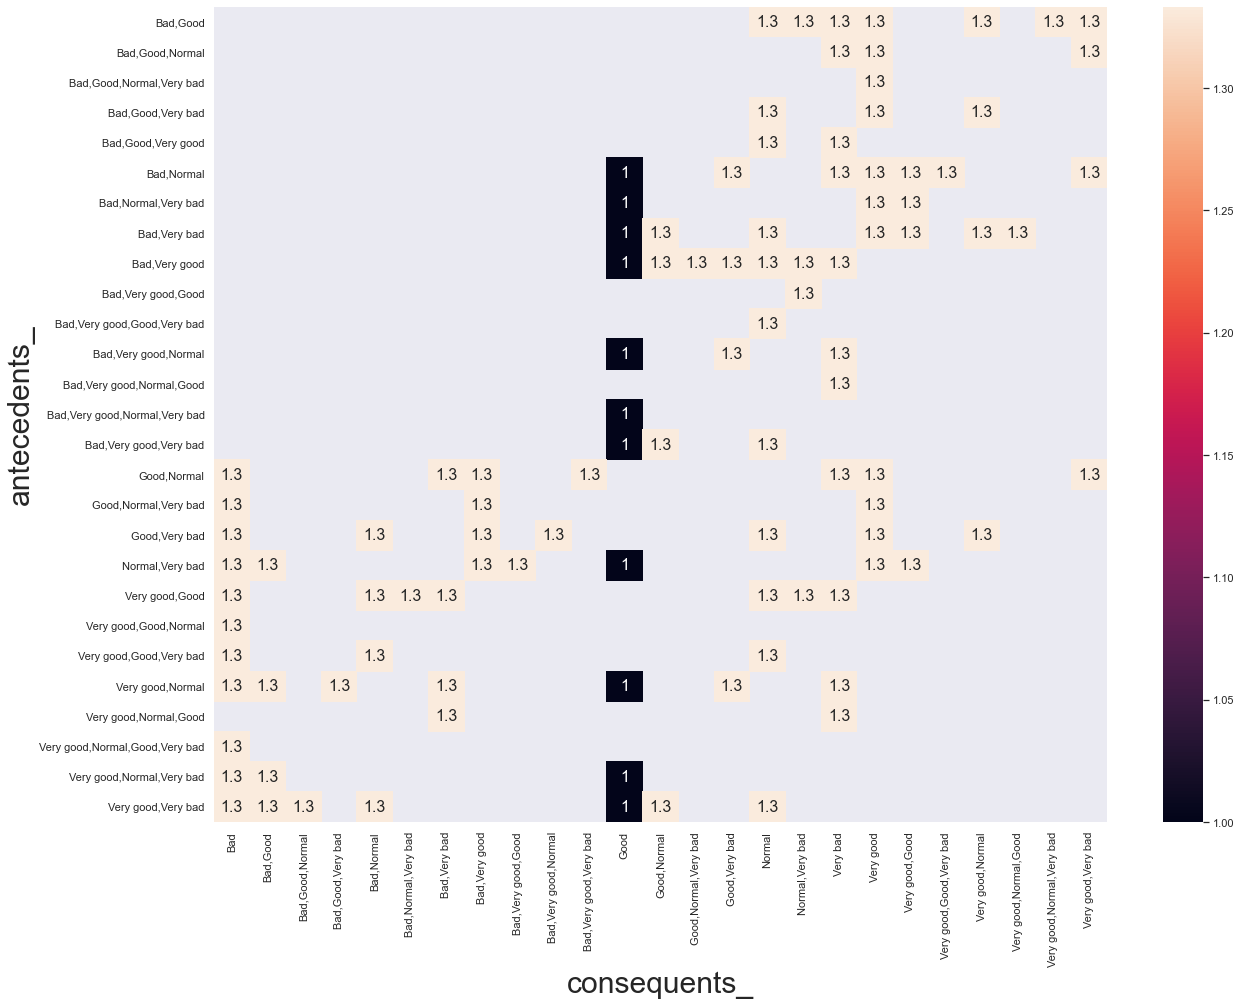

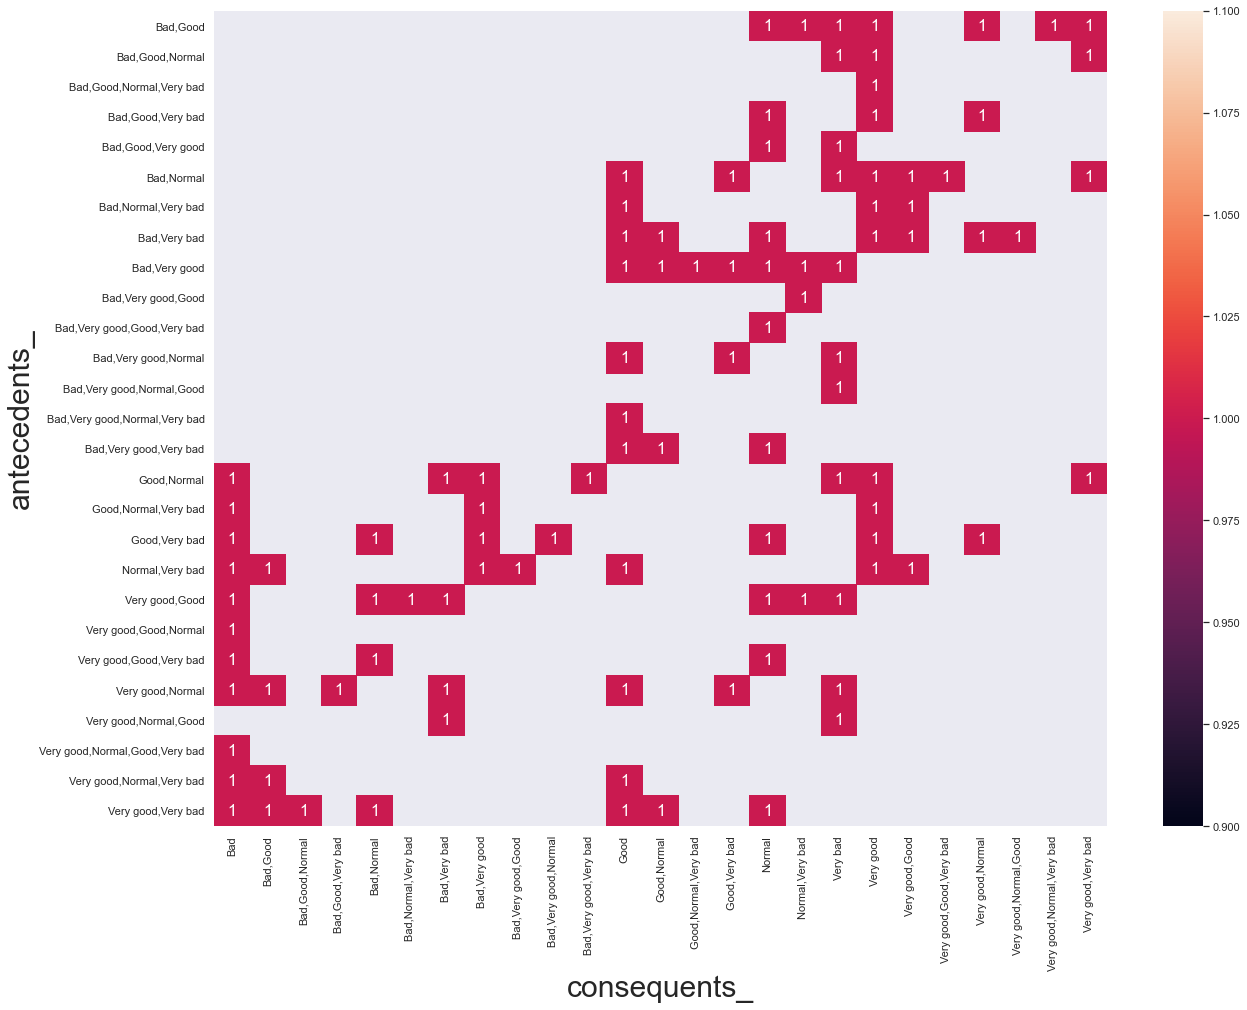

(['Yes', 'No', 'Not applicable'],
 [Felling_right_now     Bad    Good  Normal  Very bad  Very good
  Year                                                          
  1st year              0.0  2250.0   120.0       1.0     3900.0
  2nd year            270.0  1950.0   975.0       6.0     4785.0
  3rd year            750.0  3300.0  2505.0      18.0     4400.0
  4th year           1081.0  3925.0  2259.0      32.0     7093.0,
  Felling_right_now    Bad    Good  Normal  Very bad  Very good
  Year                                                         
  1st year           980.0  1725.0  2844.0      30.0      800.0
  2nd year           930.0  1125.0  1590.0      32.0      200.0
  3rd year           270.0   150.0   240.0      27.0        0.0
  4th year             0.0    75.0     0.0       0.0        0.0,
  Felling_right_now  Bad  Good  Normal  Very bad  Very good
  Year                                                     
  1st year           180    75     105         8        100
  2nd year

In [ ]:
apriori_association_rules(df1,'Living_place_happiness')

**Have you used any social media within the last 6 hours?**

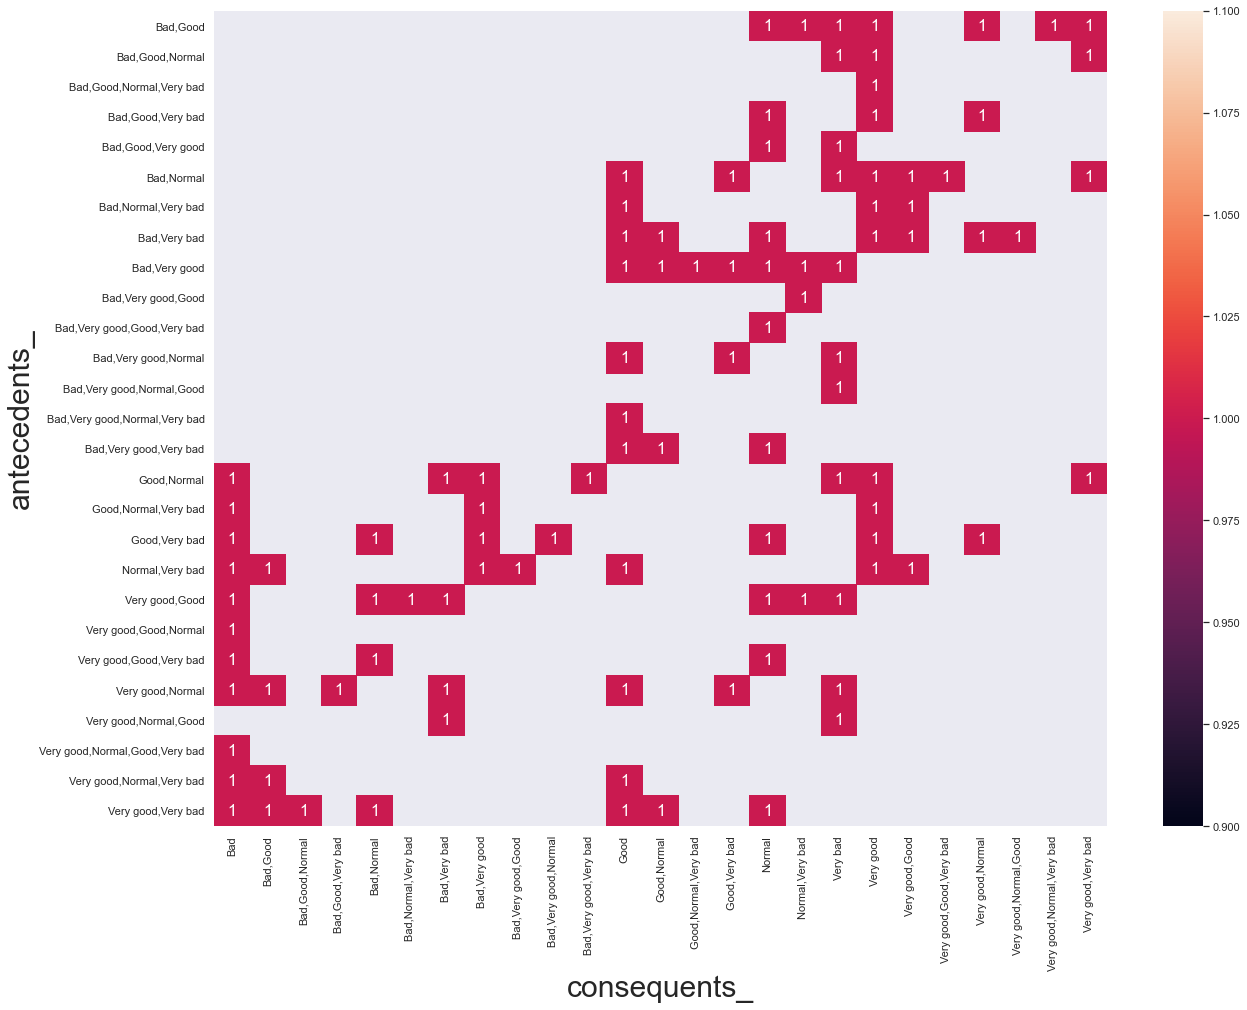

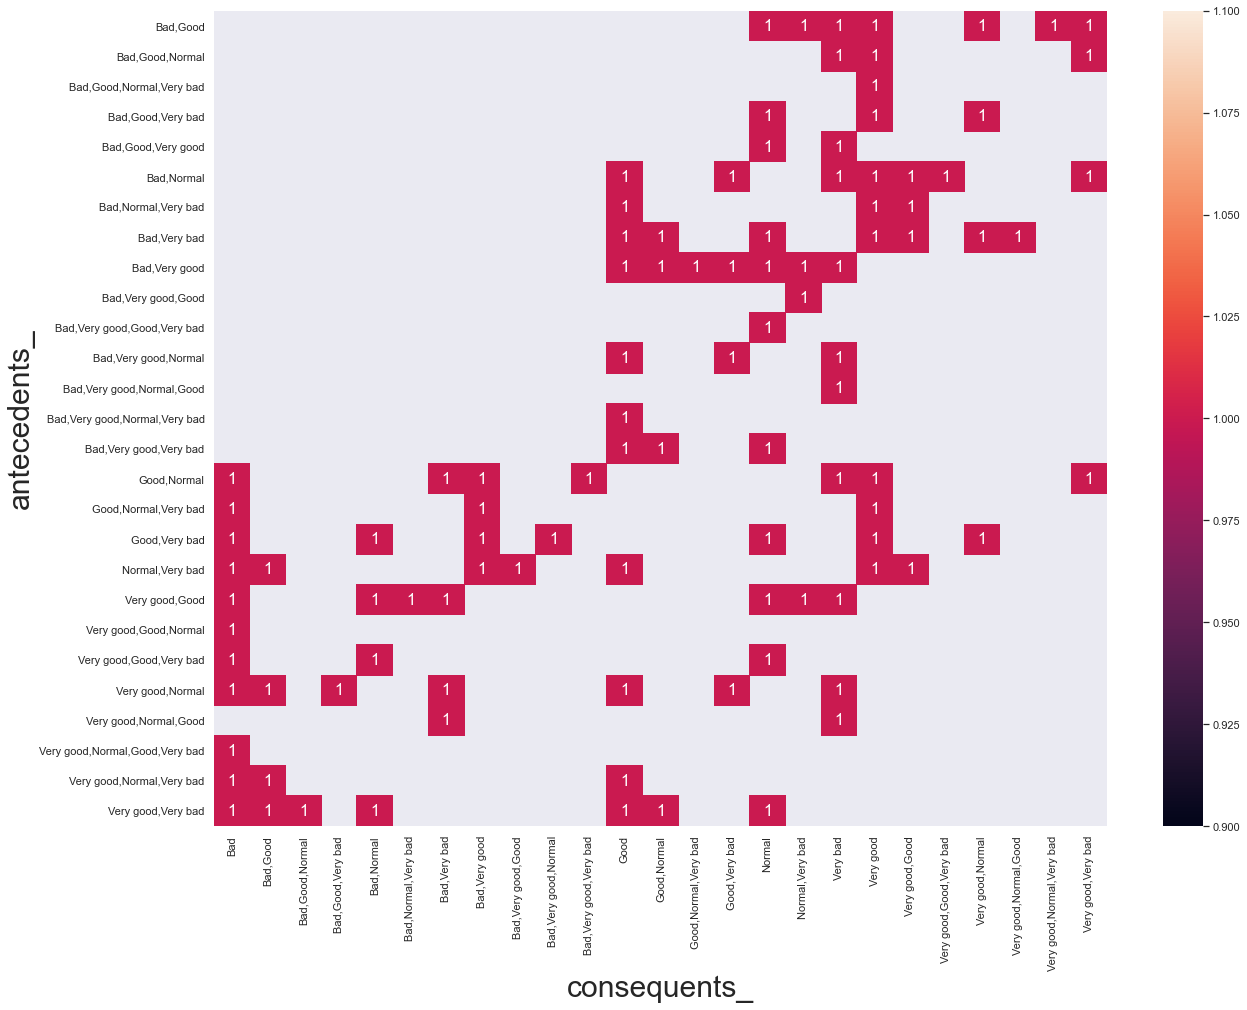

(['Yes', 'No'],
 [Felling_right_now  Bad  Good  Normal  Very bad  Very good
  Year                                                     
  1st year           740  2850    2040        26       4100
  2nd year           990  2325    1860        26       3910
  3rd year           780  2925    1650        27       4000
  4th year           181  2275     780         8       5693,
  Felling_right_now  Bad  Good  Normal  Very bad  Very good
  Year                                                     
  1st year           420  1200    1029        13        700
  2nd year           450   825     840        17       1175
  3rd year           480   675    1215        21        600
  4th year           900  1725    1479        24       1400],
 [Felling_right_now  Bad  Good  Normal  Very bad  Very good
  Year                                                     
  1st year             1     1       1         1          1
  2nd year             1     1       1         1          1
  3rd year           

In [ ]:
apriori_association_rules(df1,'Using_social_media')

### ***The End***